# **Creación del árbol binario para la compresión.**
Para implementar la idea de compresión de texto, se utiliza una estructura llamada árbol binario. En este tipo de árbol:

* Cada nodo puede tener máximo dos hijos (por eso se llama binario).




*  Ir a la izquierda representa un 0.

* Ir a la derecha representa un 1.

Las letras más frecuentes se colocan más cerca de la raíz del árbol, para que su código binario sea más corto.

In [ ]:
!apt install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!pip install graphviz

In [ ]:
import heapq
from collections import Counter
from graphviz import Digraph
from IPython.display import Image, display

# Clase para los nodos del árbol de Huffman
class Nodo:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.izq = None
        self.der = None

    def __lt__(self, otro):
        return self.freq < otro.freq

# Construir el árbol de Huffman
def construir_arbol(texto):
    frecuencias = Counter(texto)
    heap = [Nodo(c, f) for c, f in frecuencias.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        nodo1 = heapq.heappop(heap)
        nodo2 = heapq.heappop(heap)
        combinado = Nodo(None, nodo1.freq + nodo2.freq)
        combinado.izq = nodo1
        combinado.der = nodo2
        heapq.heappush(heap, combinado)

    return heap[0]

# Asignar códigos binarios a cada letra
def asignar_codigos(nodo, prefijo="", codigos={}):
    if nodo is None:
        return
    if nodo.char is not None:
        codigos[nodo.char] = prefijo
    asignar_codigos(nodo.izq, prefijo + "0", codigos)
    asignar_codigos(nodo.der, prefijo + "1", codigos)
    return codigos

# Codificar el texto original a binario
def codificar(texto, codigos):
    return ''.join(codigos[char] for char in texto)

# Decodificar el binario usando el árbol
def decodificar(binario, raiz):
    resultado = ""
    nodo = raiz
    for bit in binario:
        nodo = nodo.izq if bit == "0" else nodo.der
        if nodo.char is not None:
            resultado += nodo.char
            nodo = raiz
    return resultado

# Dibujar árbol
def dibujar_arbol(nodo, nombre_archivo="huffman_tree"):
    dot = Digraph(comment="Árbol de Huffman")
    dot.attr("node", style="filled", fontname="Helvetica", fontsize="12")

    def recorrer(n, nombre):
        if n is None:
            return
        if n.char is not None:
            etiqueta = f"{n.char}\\n{n.freq}"
            dot.node(nombre, etiqueta, shape="circle", fillcolor="#FFECB3", fontcolor="#000000")
        else:
            etiqueta = f"{n.freq}"
            dot.node(nombre, etiqueta, shape="ellipse", fillcolor="#90CAF9", fontcolor="#000000")

        if n.izq:
            recorrer(n.izq, nombre + "0")
            dot.edge(nombre, nombre + "0", label="0", color="#4CAF50")
        if n.der:
            recorrer(n.der, nombre + "1")
            dot.edge(nombre, nombre + "1", label="1", color="#F44336")

    recorrer(nodo, "root")
    dot.render(nombre_archivo, format="png", cleanup=True)
    return nombre_archivo + ".png"

In [ ]:
# ----------- EJECUCIÓN ------------

# Texto de prueba
texto = "manzanas_amarillas_de_ana"

# Construcción del árbol y codificación
arbol = construir_arbol(texto)
codigos = asignar_codigos(arbol)
comprimido = codificar(texto, codigos)
descomprimido = decodificar(comprimido, arbol)

# Mostrar resultados
print("🔡 Códigos de Huffman:")
for k, v in sorted(codigos.items()):
    print(f"{k!r}: {v}")

print(f"\n📦 Texto comprimido (binario):\n{comprimido}")
print(f"\n🔓 Texto descomprimido:\n{descomprimido}")

🔡 Códigos de Huffman:
'_': 011
'a': 11
'd': 0000
'e': 10101
'i': 0001
'l': 1011
'm': 1001
'n': 010
'r': 10100
's': 001
'z': 1000

📦 Texto comprimido (binario):
100111010100011010110010111110011110100000110111011110010110000101010111101011

🔓 Texto descomprimido:
manzanas_amarillas_de_ana


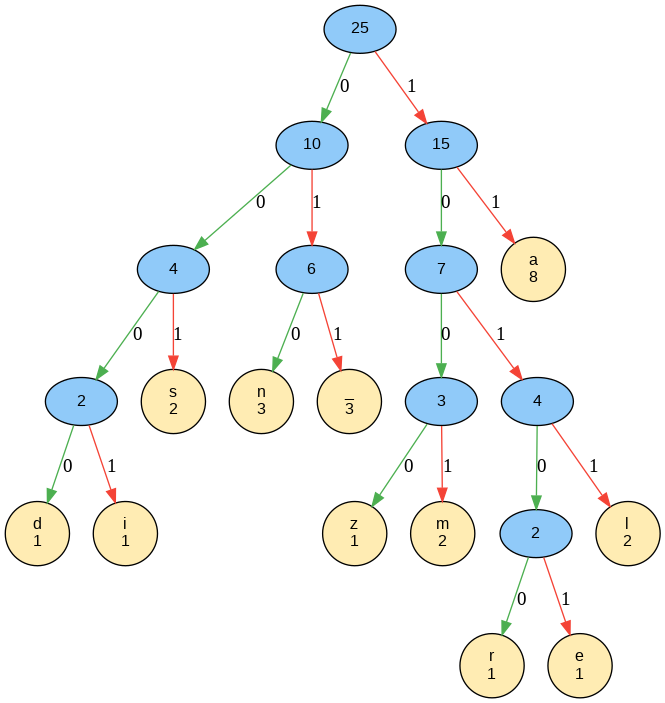

In [ ]:
# Dibujar árbol
imagen = dibujar_arbol(arbol)
display(Image(imagen))

In [ ]:
codigo_huffman = {
    "011": "_",
    "11": "a",
    "0000": "d",
    "10101": "e",
    "0001": "i",
    "1011": "l",
    "1001": "m",
    "010": "n",
    "10100": "r",
    "001": "s",
    "1000": "z"
}

binario = "100111010100011010110010111110011110100000110111011110010110000101010111101011"

# Decodificador Huffman
buffer = ""
resultado = ""

for bit in binario:
    buffer += bit
    if buffer in codigo_huffman:
        resultado += codigo_huffman[buffer]
        buffer = ""

print(resultado)


manzanas_amarillas_de_ana
